<a href="https://colab.research.google.com/github/s26673/POSI_MON1/blob/main/Cwiczenia6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ćwiczenia 6

## Wprowadzenie

### Czym jest perceptron?

**Perceptron** to najprostszy model sztucznego neuronu — podstawowy element sieci neuronowych.  
Został zaproponowany przez **Franka Rosenblatta** w 1958 roku.

Jego zadaniem jest **klasyfikacja liniowa** — tzn. rozdzielanie danych za pomocą prostej (w 2D), płaszczyzny (w 3D) lub hiperpłaszczyzny (w przestrzeni wielowymiarowej).


### Wzór matematyczny perceptronu

Perceptron przyjmuje **wektor wejść** i **oblicza wyjście** według poniższego wzoru:

$$
y = f(\mathbf{w} \cdot \mathbf{x} + b)
$$

Gdzie:
- $ \mathbf{x} = [x_1, x_2, \dots, x_n] $ — wektor wejściowy,  
- $ \mathbf{w} = [w_1, w_2, \dots, w_n] $ — wektor wag,
- $ \mathbf{w} \cdot \mathbf{x} = \sum_{i=1}^{n}{w_ix_i} $ - iloczyn skalarny
- $ b $ — bias (przesunięcie),  
- $ f(\cdot) $ — funkcja aktywacji (np. skokowa).

Dla perceptronu Rosenblatta funkcja aktywacji to:

$$
f(z) =
\begin{cases}
1 & \text{jeśli } z \ge 0 \\
0 & \text{jeśli } z < 0
\end{cases}
$$

### Równoważny zapis z przesunięciem jako dodatkową wagą

Równoważnie, ponieważ:

$$
\mathbf{w} \cdot \mathbf{x} + b = (\mathbf{w}, b) \cdot (\mathbf{x}, 1),
$$

możemy potraktować składnik $ b $ jako dodatkową wagę $ w_{m+1} $,
a do każdego wektora wejściowego $ \mathbf{x} $ dodać dodatkową współrzędną równą $ 1 $.

Wówczas równanie perceptronu można zapisać jako:

$$
y = f(\tilde{\mathbf{w}} \cdot \tilde{\mathbf{x}}),
$$

gdzie:

$$
\tilde{\mathbf{w}} = [w_1, w_2, \dots, w_m, b], \quad
\tilde{\mathbf{x}} = [x_1, x_2, \dots, x_m, 1].
$$

Taki zapis oznacza, że perceptron można traktować jako **liniowy klasyfikator przechodzący przez początek układu współrzędnych** (ponieważ bias został włączony do przestrzeni wag).


### Przykład obliczenia perceptronu

Załóżmy, że mamy następujące dane wejściowe:

$$ \mathbf{x} = [0.6, 0.3], \mathbf{w} = [0.4, 0.7] $$

$$
\begin{aligned}
x_1 &= 0.6, \\
x_2 &= 0.3, \\
w_1 &= 0.4, \\
w_2 &= 0.7, \\
b &= -0.5
\end{aligned}
$$

#### Krok 1. Obliczenie sumy ważonej

$$
z = w_1 x_1 + w_2 x_2 + b
$$

$$
z = (0.4)(0.6) + (0.7)(0.3) - 0.5 = 0.24 + 0.21 - 0.5 = -0.05
$$

#### Krok 2. Zastosowanie funkcji aktywacji

$$
y = f(z) =
\begin{cases}
1 & \text{jeśli } z \ge 0 \\
0 & \text{jeśli } z < 0
\end{cases}
$$

Ponieważ $z = -0.05 < 0 $, więc:

$$
\boxed{y = 0}
$$

<br><br>

### Przykład kiedy przesunięcie jest dodane jako dodatkowa waga

$$ \mathbf{x} = [0.6, 0.3, 1], \mathbf{w} = [0.4, 0.7, -0.5] $$

$$
\begin{aligned}
x_1 &= 0.6, \\
x_2 &= 0.3, \\
x_3 &= 1, \\
w_1 &= 0.4, \\
w_2 &= 0.7, \\
w_3 &= -0.5
\end{aligned}
$$

#### Krok 1. Obliczenie sumy ważonej

$$
z = w_1 x_1 + w_2 x_2 + w_3 x_3
$$

$$
z = (0.4)(0.6) + (0.7)(0.3) + (-0.5)(1) = 0.24 + 0.21 - 0.5 = -0.05
$$

#### Krok 2. Zastosowanie funkcji aktywacji

$$
y = f(z) =
\begin{cases}
1 & \text{jeśli } z \ge 0 \\
0 & \text{jeśli } z < 0
\end{cases}
$$

Ponieważ $z = -0.05 < 0 $, więc:

$$
\boxed{y = 0}
$$

### Aktualizacja wag (uczenie perceptronu)

Jeśli perceptron popełni błąd (tzn. jego wyjście $ y \neq \hat{y} $, gdzie $ y $ to etykieta, a $\hat{y}$ to wartość przewidywana), wagi są aktualizowane zgodnie z regułą:

$$
\hat{\mathbf{w}} = \mathbf{w} + \eta \times (y - \hat{y}) \times \mathbf{x}
$$

$$
w_i^{(new)} = w_i^{(old)} + \eta (y - \hat{y}) x_i
$$

$$
b^{(new)} = b^{(old)} + \eta (y - \hat{y})
$$

Gdzie $ \eta $ to współczynnik uczenia (learning rate).

Jeśli perceptron **poprawnie klasyfikuje** przykład ($y = \hat{y}$), to $y - \hat{y} = 0$, więc **wagi się nie zmieniają**.  
Jeśli perceptron **błądzi**, to wagi są **korygowane w kierunku** wektora $\mathbf{x}$, aby następnym razem zwiększyć szansę poprawnej klasyfikacji.

### Przykład nauki perceptronu dla bramki AND


| A | B | Y |
|:-:|:-:|:----------:|
| 0 | 0 |     0      |
| 0 | 1 |     0      |
| 1 | 0 |     0      |
| 1 | 1 |     1      |


$
\mathbf{w} = [0.4, 0.4]
$

$
\mathbf{b} = 0.7
$

<br>

Dodanie przesunięcia do wektora wag:

$\tilde{\mathbf{w}} = [0.4, 0.4, 0.7]$

Równanie perceptronu:

$
y = f(\tilde{\mathbf{w}} \cdot \tilde{\mathbf{x}})
$

Funkcja aktywacji:

$
f(z) =
\begin{cases}
1 & \text{jeśli } z \ge 0 \\
0 & \text{jeśli } z < 0
\end{cases}
$

Reguła aktualizacji wag:

$ \hat{\mathbf{w}} = \mathbf{w} + \eta \times (y - \hat{y}) \times \mathbf{x} $


#### Epoka 1

$I.$ Dla $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.4, 0.4, 0.7] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.4 \times 0 + 0.4 \times 0 + 0.7 \times 1 = 0.7$

$ y = f(0.7) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

$y - \hat{y} = -1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.7] + 0.1 \times (0 - 1) \times [0, 0, 1] $

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.7] + [0, 0, -0.1] = [0.4, 0.4, 0.6] $

<br><br>

$II.$ Dla $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.4, 0.4, 0.6] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.4 \times 0 + 0.4 \times 1 + 0.6 \times 1 = 1 $

$ y = f(1) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

$y - \hat{y} = -1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.6] + 0.1 \times (0 - 1) \times [0, 1, 1] $

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.6] + [0, -0.1, -0.1] = [0.4, 0.3, 0.5] $

<br><br>

$III.$ Dla $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.4, 0.3, 0.5] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.4 \times 1 + 0.3 \times 0 + 0.5 \times 1 = 0.4 + 0.5 = 0.9 $

$ y = f(0.9) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

$y - \hat{y} = -1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.4, 0.3, 0.5] + 0.1 \times (0 - 1) \times [1, 0, 1] $

$ \hat{\mathbf{w}} = [0.4, 0.3, 0.5] + [-0.1, 0, -0.1] = [0.3, 0.3, 0.4] $

<br><br>

$IV.$ Dla $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.3, 0.4] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 1 + 0.3 \times 1 + 0.4 \times 1 = 0.3 + 0.3 + 0.4 = 1 $

$ y = f(1) = 1 $

<br>

Poprawny wynik, ponieważ $y = 1$, a $\hat{y} = 1$


#### Epoka 2

$I.$ Dla $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.3, 0.4] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 0 + 0.3 \times 0 + 0.4 \times 1 = 0.4$

$ y = f(0.4) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.4] + 0.1 \times (0 - 1) \times [0, 0, 1] $

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.4] + [0, 0, -0.1] = [0.3, 0.3, 0.3] $

<br><br>

$II.$ Dla $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.3, 0.3] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 0 + 0.3 \times 1 + 0.3 \times 1 = 0.6 $

$ y = f(0.6) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$


<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.3] + 0.1 \times (0 - 1) \times [0, 1, 1] $

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.3] + [0, -0.1, -0.1] = [0.3, 0.2, 0.2] $

<br><br>

$III.$ Dla $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.2, 0.2] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 1 + 0.2 \times 0 + 0.2 \times 1 = 0.3 + 0.2 = 0.5 $

$ y = f(0.5) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.3, 0.2, 0.2] + 0.1 \times (0 - 1) \times [1, 0, 1] $

$ \hat{\mathbf{w}} = [0.3, 0.2, 0.2] + [-0.1, 0, -0.1] = [0.2, 0.2, 0.1] $

<br><br>

$IV.$ Dla $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.2, 0.1] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 1 + 0.2 \times 1 + 0.1 \times 1 = 0.2 + 0.2 + 0.1 = 0.5 $

$ y = f(0.5) = 1 $

<br>

Poprawny wynik, ponieważ $y = 1$, a $\hat{y} = 1$


#### Epoka 3

$I.$ Dla $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.2, 0.1] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 0 + 0.2 \times 0 + 0.1 \times 1 = 0.1$

$ y = f(0.1) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.1] + 0.1 \times (0 - 1) \times [0, 0, 1] $

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.1] + [0, 0, -0.1] = [0.2, 0.2, 0.0] $

<br><br>

$II.$ Dla $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.2, 0.0] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 0 + 0.2 \times 1 + 0.0 \times 1 = 0.2 $

$ y = f(0.2) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$


<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.0] + 0.1 \times (0 - 1) \times [0, 1, 1] $

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.0] + [0, -0.1, -0.1] = [0.2, 0.1, -0.1] $

<br><br>

$III.$ Dla $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.1, -0.1] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 1 + 0.1 \times 0 + (-0.1) \times 1 = 0.2 - 0.1 = 0.1 $

$ y = f(0.1) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.2, 0.1, -0.1] + 0.1 \times (0 - 1) \times [1, 0, 1] $

$ \hat{\mathbf{w}} = [0.2, 0.1, -0.1] + [-0.1, 0, -0.1] = [0.1, 0.1, -0.2] $

<br><br>

$IV.$ Dla $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 1 + 0.1 \times 1 + (-0.2) \times 1 = 0.1 + 0.1 - 0.2 = 0 $

$ y = f(0) = 1 $

<br>

Poprawny wynik, ponieważ $y = 1$, a $\hat{y} = 1$


#### Epoka 4

$I.$ Dla $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 0 + 0.1 \times 0 + (-0.2) \times 1 = -0.2$

$ y = f(-0.2) = 0 $

<br>

Poprawny wynik, ponieważ $y = 1$, a $\hat{y} = 1$

<br><br>

$II.$ Dla $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 0 + 0.1 \times 1 + (-0.2) \times 1 = -0.1 $

$ y = f(-0.1) = 0 $

<br>

Poprawny wynik, ponieważ $y = 1$, a $\hat{y} = 1$

<br><br>

$III.$ Dla $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 1 + 0.1 \times 0 + (-0.2) \times 1 = 0.1 - 0.2 = -0.1$

$ y = f(-0.1) = 0 $

<br>

Poprawny wynik, ponieważ $y = 1$, a $\hat{y} = 1$

<br><br>

$IV.$ Dla $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 1 + 0.1 \times 1 + (-0.2) \times 1 = 0.1 + 0.1 - 0.2 = 0 $

$ y = f(0) = 1 $

<br>

Poprawny wynik, ponieważ $y = 1$, a $\hat{y} = 1$

<br><br>

## W tej epoce perceptron wyznacza poprawne wyniki | Koniec uczenia

### Przykład użycia Perceptronu w kodzie Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

df = pd.DataFrame(X, columns = ['feature_1', 'feature_2'])
df['target'] = y

X = df[['feature_1', 'feature_2']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Dokładność:", accuracy)

Dokładność: 0.975


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


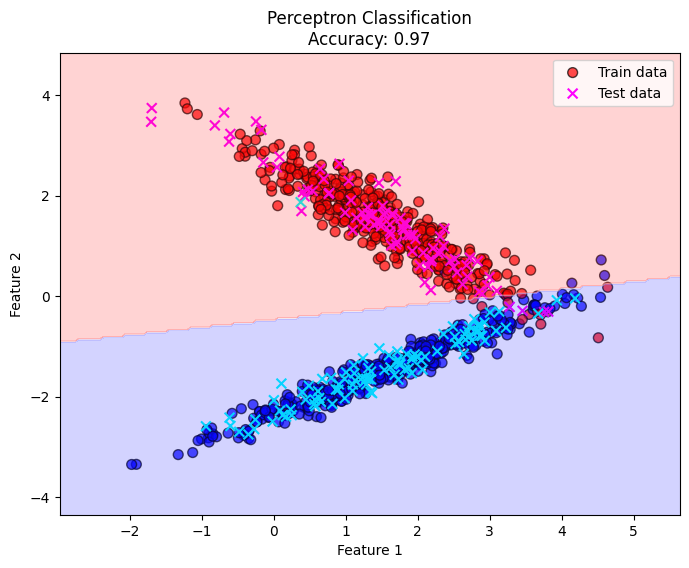

In [2]:
import numpy as np

plt.figure(figsize=(8,6))
plt.scatter(X_train['feature_1'], X_train['feature_2'], c=y_train, cmap='bwr', edgecolor='k', s=50, alpha=0.7)
plt.scatter(X_test['feature_1'], X_test['feature_2'], c=y_test, cmap='cool', marker='x', s=50, label='Test data')

x_min, x_max = X['feature_1'].min() - 1, X['feature_1'].max() + 1
y_min, y_max = X['feature_2'].min() - 1, X['feature_2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Perceptron Classification\nAccuracy: {accuracy:.2f}')
plt.legend(['Train data','Test data'])
plt.show()


### Podsumowanie perceptronu

Perceptron:
- oblicza **ważoną sumę wejść**,  
- stosuje **funkcję aktywacji (zazwyczaj progową)**,  
- może się **uczyć** poprzez aktualizację wag,  
- działa tylko dla **liniowo separowalnych** danych.

## Zadania

### Zadanie 1
Dla bramki OR przeprowadź naukę perceptronu
| A | B | Y = A ∨ B |
|:-:|:-:|:----------:|
| 0 | 0 |     0      |
| 0 | 1 |     1      |
| 1 | 0 |     1      |
| 1 | 1 |     1      |


$
\mathbf{w} = [0.7, 0.6]
$

$
\mathbf{b} = -1.4
$

In [3]:
import numpy as np

# Dane wejściowe dla bramki OR
X = np.array([
    [0, 0, 1],  # dodatkowa 1 dla biasu
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
y = np.array([0, 1, 1, 1])

# wagi początkowe
w = np.array([0.7, 0.6, -1.4])  # wagi + bias
eta = 0.1 # wpolczynnik uczenia

def activation(z):
    return 1 if z >= 0 else 0

# Uczenie perceptronu
for epoch in range(10):
    errors = 0
    for xi, target in zip(X, y):
        z = np.dot(w, xi)
        y_pred = activation(z)
        error = target - y_pred
        if error != 0:
            w = w + eta * error * xi
            errors += 1
    print(f"Epoka {epoch+1}, wagi: {w}, błędy: {errors}")
    if errors == 0:
        break

print("Finalne wagi:", w)

Epoka 1, wagi: [ 0.8  0.7 -1.2], błędy: 2
Epoka 2, wagi: [ 0.9  0.8 -1. ], błędy: 2
Epoka 3, wagi: [ 0.9  0.9 -0.9], błędy: 1
Epoka 4, wagi: [ 0.9  0.9 -0.9], błędy: 0
Finalne wagi: [ 0.9  0.9 -0.9]


### Zadanie 2
Dla poniższych wartości przeprowadź naukę perceptronu

$$
X =
\begin{bmatrix}
1.4 & 2.5 & 0.6 \\
0.8 & 1.5 & -0.1 \\
1.2 & 2.1 & -0.3 \\
0.9 & 2.1 & 0.5
\end{bmatrix},
\quad
y =
\begin{bmatrix}
1 \\ 0 \\ 1 \\ 0
\end{bmatrix}
$$

$$
w =
\begin{bmatrix}
1.1 \\ 1.2 \\ 0.7
\end{bmatrix},
\quad
b = -0.5,
\quad
\eta = 0.1
$$


In [4]:
import numpy as np

# === ZADANIE 2: nauka perceptronu ===

# Dane X z obrazka (4 próby, 3 cechy)
X = np.array([
    [1.4, 2.5, 0.6],
    [0.8, 1.5, -0.1],
    [1.2, 2.1, -0.3],
    [0.9, 2.1, 0.5]
])

y = np.array([1, 0, 1, 0])

# Dodajemy kolumnę 1 dla biasu
X_bias = np.hstack([X, np.ones((X.shape[0], 1))])

# Wagi początkowe + bias jako ostatnia waga
w = np.array([1.1, 1.2, 0.7, -0.5])

eta = 0.1  # współczynnik uczenia

def activation(z):
    """Funkcja aktywacji perceptronu (progowa)"""
    return 1 if z >= 0 else 0

# Uczenie perceptronu
for epoch in range(20):  # maksymalnie 20 epok
    errors = 0
    print(f"\nEpoka {epoch+1}")

    for xi, target in zip(X_bias, y):
        z = np.dot(w, xi)
        y_pred = activation(z)
        error = target - y_pred

        print(f"  x={xi[:-1]}, z={z:.3f}, y_pred={y_pred}, y={target}, error={error}")

        if error != 0:
            w = w + eta * error * xi
            errors += 1
            print(f"    -> aktualizacja wag: {w}")

    print(f"Błędy w epoce: {errors}")
    print(f"Wagi po epoce {epoch+1}: {w}")

    if errors == 0:
        print("\nUczenie zakończone — brak błędów.")
        break

print("\nFinalne wagi:", w)


Epoka 1
  x=[1.4 2.5 0.6], z=4.460, y_pred=1, y=1, error=0
  x=[ 0.8  1.5 -0.1], z=2.110, y_pred=1, y=0, error=-1
    -> aktualizacja wag: [ 1.02  1.05  0.71 -0.6 ]
  x=[ 1.2  2.1 -0.3], z=2.616, y_pred=1, y=1, error=0
  x=[0.9 2.1 0.5], z=2.878, y_pred=1, y=0, error=-1
    -> aktualizacja wag: [ 0.93  0.84  0.66 -0.7 ]
Błędy w epoce: 2
Wagi po epoce 1: [ 0.93  0.84  0.66 -0.7 ]

Epoka 2
  x=[1.4 2.5 0.6], z=3.098, y_pred=1, y=1, error=0
  x=[ 0.8  1.5 -0.1], z=1.238, y_pred=1, y=0, error=-1
    -> aktualizacja wag: [ 0.85  0.69  0.67 -0.8 ]
  x=[ 1.2  2.1 -0.3], z=1.468, y_pred=1, y=1, error=0
  x=[0.9 2.1 0.5], z=1.749, y_pred=1, y=0, error=-1
    -> aktualizacja wag: [ 0.76  0.48  0.62 -0.9 ]
Błędy w epoce: 2
Wagi po epoce 2: [ 0.76  0.48  0.62 -0.9 ]

Epoka 3
  x=[1.4 2.5 0.6], z=1.736, y_pred=1, y=1, error=0
  x=[ 0.8  1.5 -0.1], z=0.366, y_pred=1, y=0, error=-1
    -> aktualizacja wag: [ 0.68  0.33  0.63 -1.  ]
  x=[ 1.2  2.1 -0.3], z=0.320, y_pred=1, y=1, error=0
  x=[0.9 2.1 0

### Zadanie 3
Dla zbioru danych `breast_cancer` z modułu `sklearn.datasets` przeprowadź analizę DEA oraz klasyfikację cechy `target` z wykorzystaniem perceptronu.

<br>

Przykład ładowania danych:

```
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())
```

Pamiętaj o:
- sprawdzeniu, czy są brakujące dane,
- sprawdzeniu czy jest korelacja między cechami,
- wartościach odstających,
- sprawdzeniu poprawności modulu za pomocą metryk,
- wizualizacji danych oraz wyników.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [17]:
# Sprawdzenie braków
print("Liczba braków danych:", df.isna().sum())


Liczba braków danych: mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


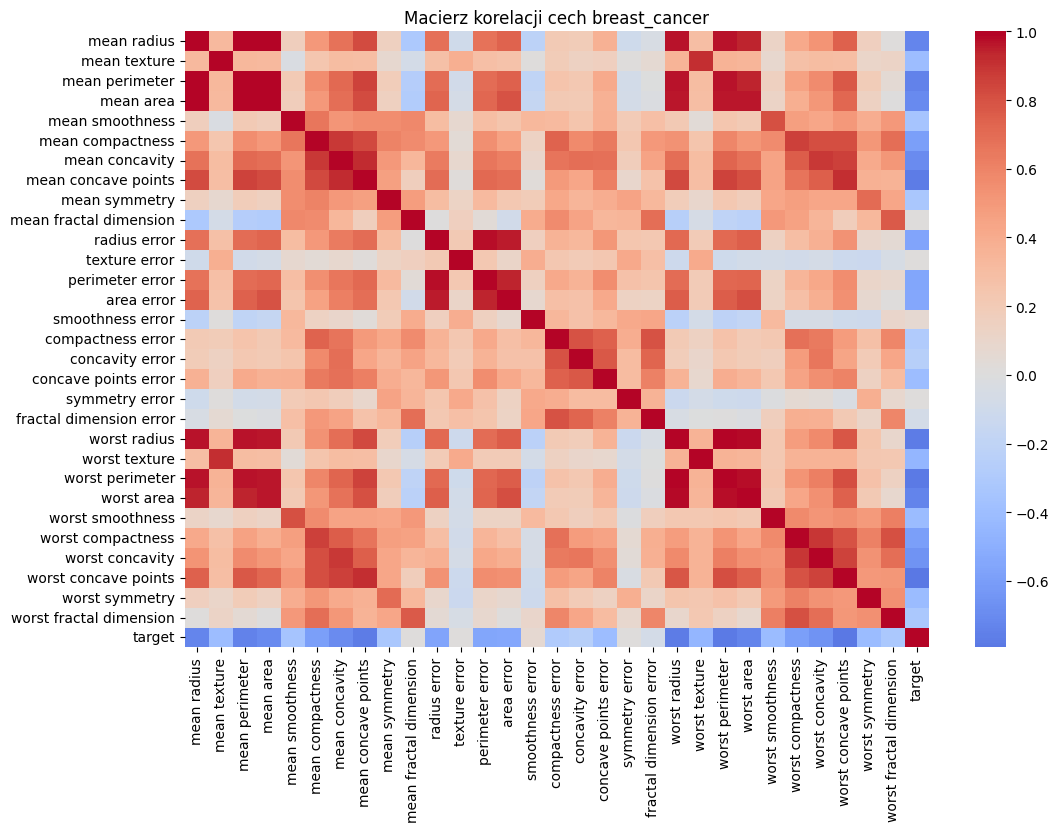

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Macierz korelacji cech breast_cancer")
plt.show()


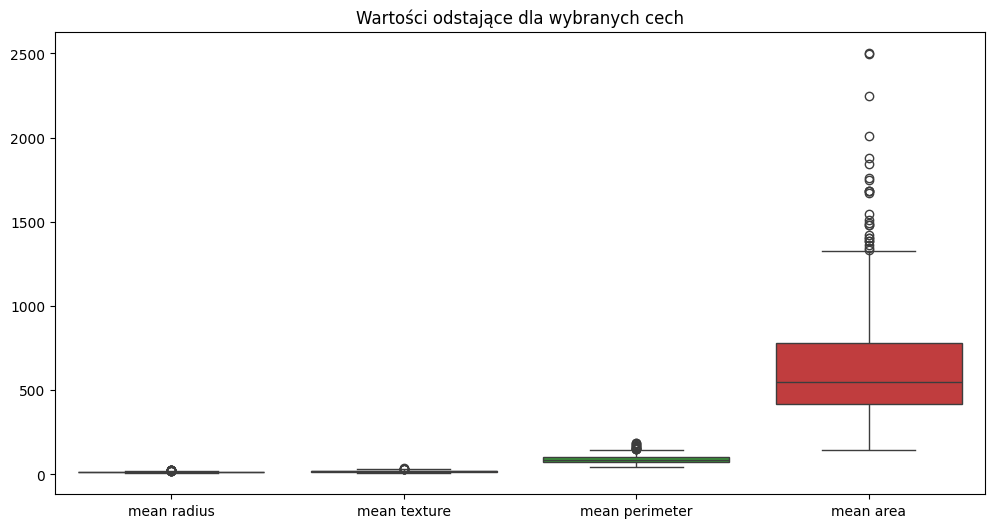

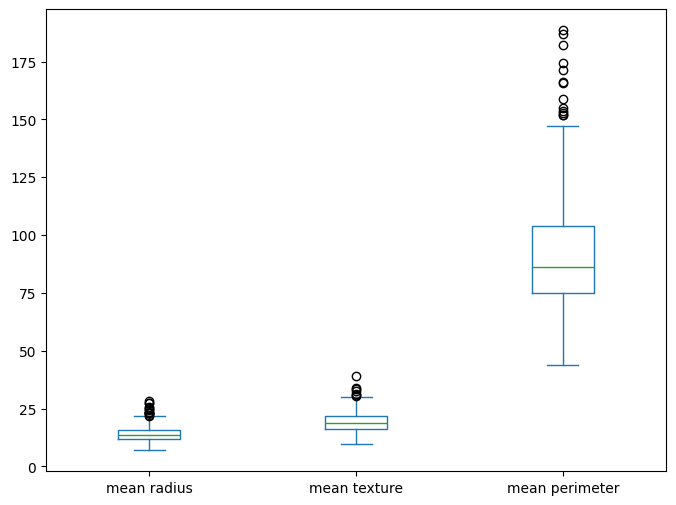

In [18]:
# Wykres pudełkowy dla kilku wybranych cech
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['mean radius','mean texture','mean perimeter','mean area']])
plt.title("Wartości odstające dla wybranych cech")
plt.show()

df[['mean radius', 'mean texture', 'mean perimeter']].plot(kind='box', figsize=(8,6))
plt.show()


In [23]:
X = df[['mean radius', 'mean texture']]
y = df['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [24]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = Perceptron(max_iter=2000, eta0=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        42
           1       0.82      0.96      0.88        72

    accuracy                           0.84       114
   macro avg       0.86      0.80      0.82       114
weighted avg       0.85      0.84      0.84       114

[[27 15]
 [ 3 69]]


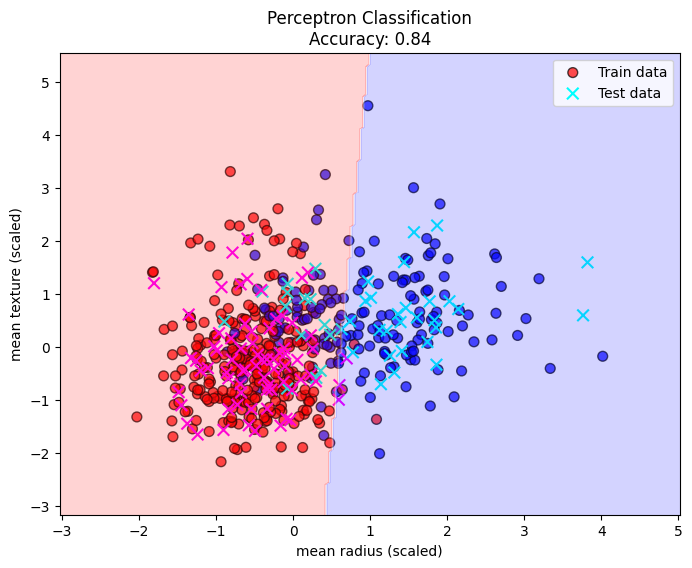

In [25]:
# TWORZYMY OSIE DECYZYJNE EXACTLY as in the provided example

plt.figure(figsize=(8,6))

# TRAIN
plt.scatter(
    X_train_scaled[:, 0],
    X_train_scaled[:, 1],
    c=y_train,
    cmap='bwr',
    edgecolor='k',
    s=50,
    alpha=0.7
)

# TEST
plt.scatter(
    X_test_scaled[:, 0],
    X_test_scaled[:, 1],
    c=y_test,
    cmap='cool',
    marker='x',
    s=70,
    label='Test data'
)

# siatka decyzyjna
x_min, x_max = X_train_scaled[:,0].min() - 1, X_train_scaled[:,0].max() + 1
y_min, y_max = X_train_scaled[:,1].min() - 1, X_train_scaled[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')

plt.xlabel('mean radius (scaled)')
plt.ylabel('mean texture (scaled)')
plt.title(f'Perceptron Classification\nAccuracy: {accuracy:.2f}')
plt.legend(['Train data','Test data'])
plt.show()
